# Case Study - 01 - Preprocessing

Task : Perform preprocessing steps on the following Train and Test datasets.

[Train](https://drive.google.com/file/d/1bAHAPBDr0aTKeIScgDoFSwovESowMhBQ/view?usp=sharing)

[Test](https://drive.google.com/file/d/11qN_kwgMewRkAsTzNhmzA9F2BkrqrNTx/view?usp=sharing)

1. Loading the necessary libraries and the datasets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('/content/train_loan.csv')
test = pd.read_csv('/content/test_loan.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


2. Handling missing values

In [9]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64



2.  Handling missing values in Credit_History column




In [11]:
train['Credit_History'].isna().sum()

50

In [12]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

<Axes: xlabel='Credit_History', ylabel='count'>

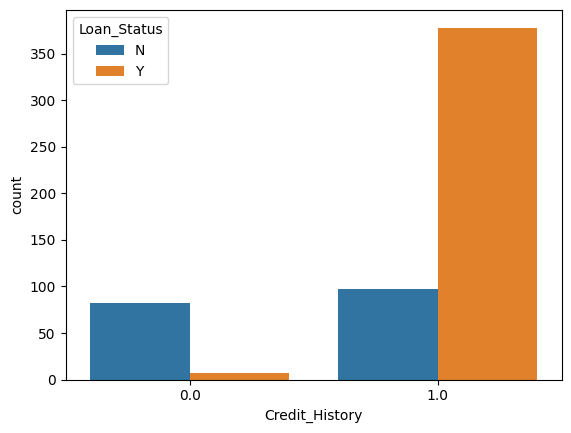

In [13]:
sns.countplot(data=train,x = 'Credit_History',hue='Loan_Status')

Credit_History = 1 indicates good credit and is more likely to get a loan approved.

Majority of applicants with Credit_History = 1 have their Loan_Status = Y (approved).

Since the majority of people with a credit history of 1 have their loan approved, filling in the missing data with the mode (1) could potentially bias the model towards predicting loan approvals. This could lead to the model being less accurate in predicting loan rejections.

Therefore, rows with missing entries for Credit_History are dropped in the following steps.


<Axes: xlabel='ApplicantIncome', ylabel='Credit_History'>

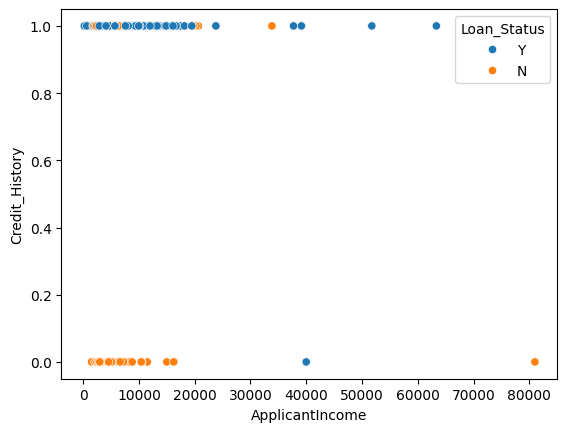

In [14]:
sns.scatterplot(data=train, x = 'ApplicantIncome', y = 'Credit_History', hue = 'Loan_Status')

From the scatterplot :

* There is a positive correlation between applicant income and credit history. This means that applicants with higher incomes tend to have better credit histories.
* There is a higher proportion of loan approvals among people with high incomes and good credit histories.
* There is a higher proportion of loan rejections among people with low incomes and bad credit histories.

 Dropping rows from train and test with null entries for Credit_History




In [19]:
train.dropna(subset=['Credit_History'],inplace=True)

In [20]:
test.dropna(subset=['Credit_History'],inplace=True)

3. Number of missing values in each column

In [21]:
train.isna().sum()

Loan_ID               0
Gender               12
Married               3
Dependents           15
Education             0
Self_Employed        26
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents            8
Education             0
Self_Employed        22
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      5
Credit_History        0
Property_Area         0
dtype: int64



4. Handling Missing values in Loan_Amount_Status

  Loan_Amount_Type is of numeric datatype but it can be noticed that it is categorical in nature.



In [23]:
print(train['Loan_Amount_Term'].unique())
print(test['Loan_Amount_Term'].unique())

[360. 120.  nan 180.  60. 300. 480. 240.  36.  84.]
[360. 240. 180.  nan  60. 480.  84.  12. 300. 350.  36. 120.   6.]


5. Using mode() to fill in the missing values in Loan_Amount_Term

In [24]:
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0])
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0])

Converting 'Loan_Amount_Term' to type 'str' inorder to visualize :

In [25]:
train['Loan_Amount_Term']=train['Loan_Amount_Term'].astype(str)
test['Loan_Amount_Term']=test['Loan_Amount_Term'].astype(str)

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

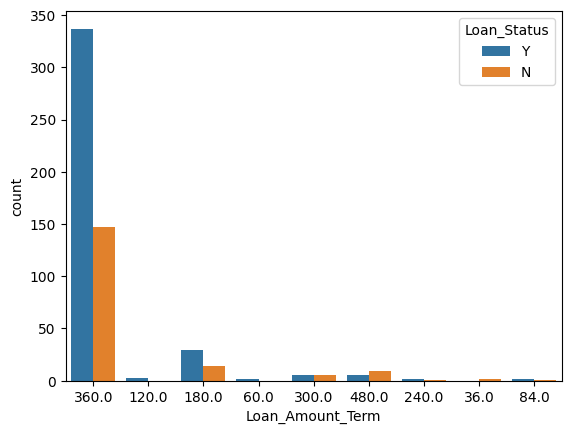

In [26]:
sns.countplot(data=train,x='Loan_Amount_Term',hue='Loan_Status')

<Axes: xlabel='ApplicantIncome', ylabel='Loan_Amount_Term'>

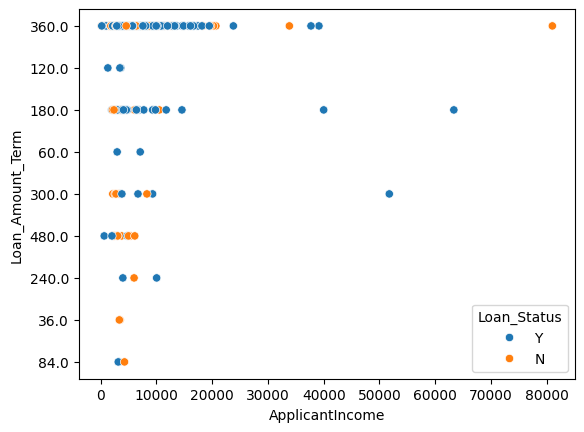

In [27]:
sns.scatterplot(data=train, x = 'ApplicantIncome', y = 'Loan_Amount_Term', hue= 'Loan_Status')

From the histogram and scatterplot above :

* There is a positive correlation between applicant income and loan amount term. This means that people with higher incomes tend to take out loans with longer terms.
* There is a higher proportion of loan approvals among people with high incomes and long loan terms.
* There is a higher proportion of loan rejections among people with low incomes and short loan terms.



6. Handling outliers and missing data in :

*   LoanAmount
*   ApplicantIncome
*   CoapplicantIncome

It is important to handle outliers first since outliers have a significant impact on mean and median.



<Axes: xlabel='LoanAmount', ylabel='ApplicantIncome'>

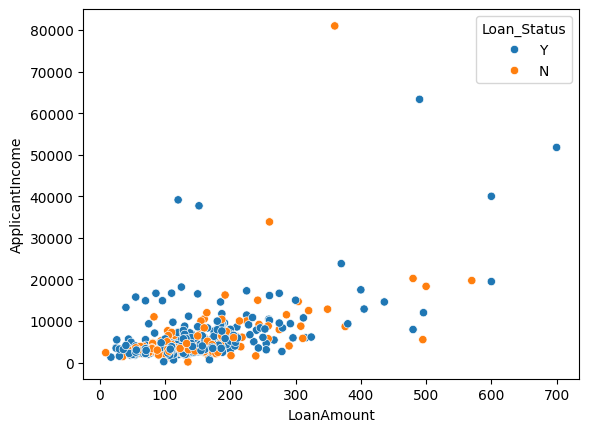

In [28]:
sns.scatterplot(data=train,x='LoanAmount', y='ApplicantIncome',hue='Loan_Status')

From the scatterplot above :
* There is a positive correlation between applicant income and loan amount. This means that people with higher incomes tend to take out larger loans.
* There is a higher proportion of loan approvals among people with high incomes and large loan amounts.
* There is a higher proportion of loan rejections among people with low incomes and small loan amounts.

7. Detecting outliers in the numerical fields using boxplots :

<Axes: ylabel='LoanAmount'>

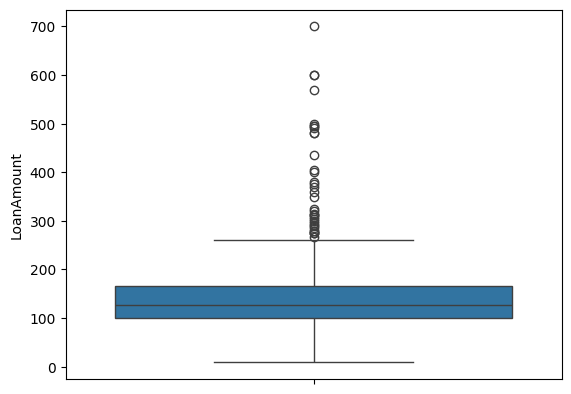

In [29]:
sns.boxplot(train['LoanAmount'])

<Axes: ylabel='ApplicantIncome'>

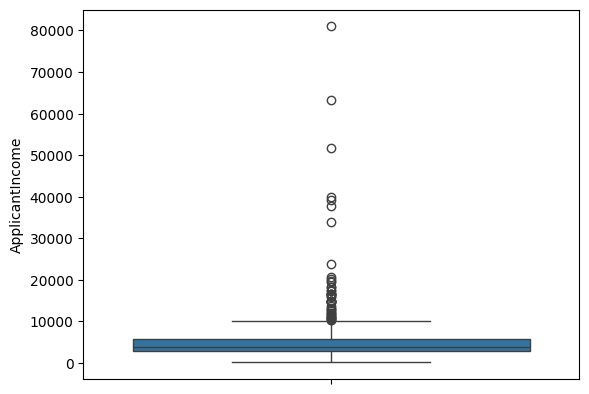

In [30]:
sns.boxplot(train['ApplicantIncome'])

<Axes: ylabel='CoapplicantIncome'>

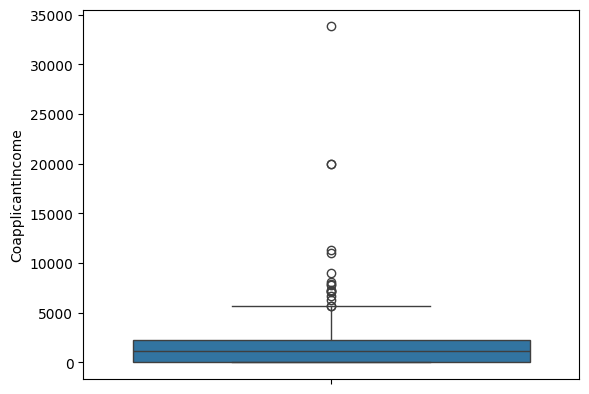

In [31]:
sns.boxplot(train['CoapplicantIncome'])

Removing outliers using Inter-quartile Range :

In [32]:
def apply_limit_imputer(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1

    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)

    def limit_imputer(value):
        if value > upper_limit:
            return upper_limit
        elif value < lower_limit:
            return lower_limit
        else:
            return value


    df[column_name] = df[column_name].apply(limit_imputer)

In [33]:
apply_limit_imputer(train, 'ApplicantIncome')
apply_limit_imputer(train, 'CoapplicantIncome')
apply_limit_imputer(train, 'LoanAmount')

Boxplots after handling the outliers :

<Axes: ylabel='LoanAmount'>

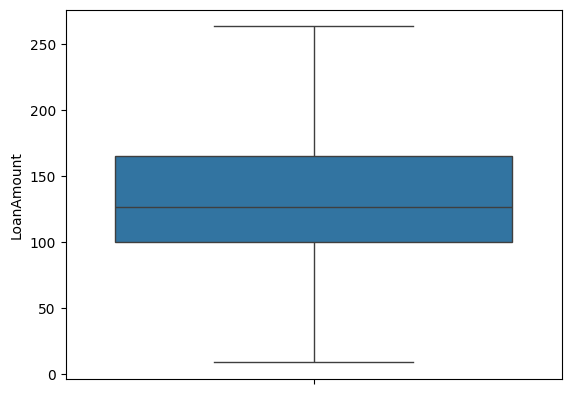

In [34]:
sns.boxplot(train['LoanAmount'])

<Axes: ylabel='ApplicantIncome'>

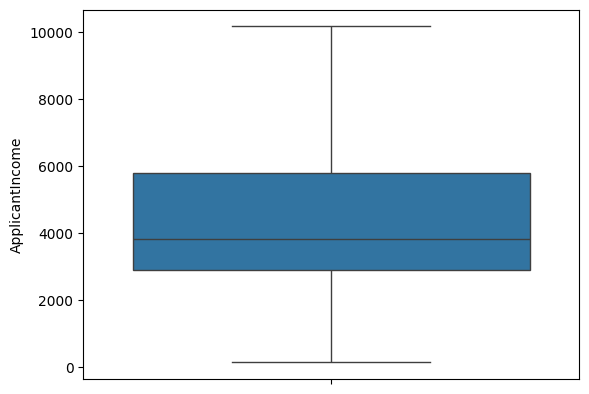

In [35]:
sns.boxplot(train['ApplicantIncome'])

<Axes: ylabel='CoapplicantIncome'>

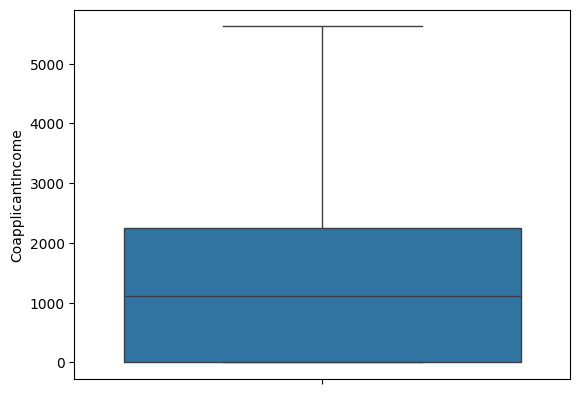

In [36]:
sns.boxplot(train['CoapplicantIncome'])

8. Handling missing values by filling in null fields using median of 'LoanAmount'

In [37]:
train['LoanAmount'].isna().sum()

21

In [38]:
train['LoanAmount']=train['LoanAmount'].fillna(train['LoanAmount'].median())

In [40]:
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].median())

In [41]:
print(train['LoanAmount'].isna().sum())
print(test['LoanAmount'].isna().sum())

0
0


9. Handling missing values of categorical attributes

<Axes: xlabel='Gender', ylabel='count'>

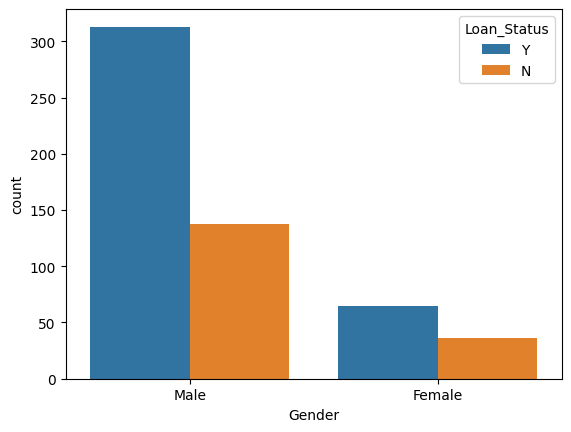

In [42]:
sns.countplot(data=train, x='Gender',hue='Loan_Status')

The plot shows that males are more likely to get their loan approved than females.

<Axes: xlabel='Married', ylabel='count'>

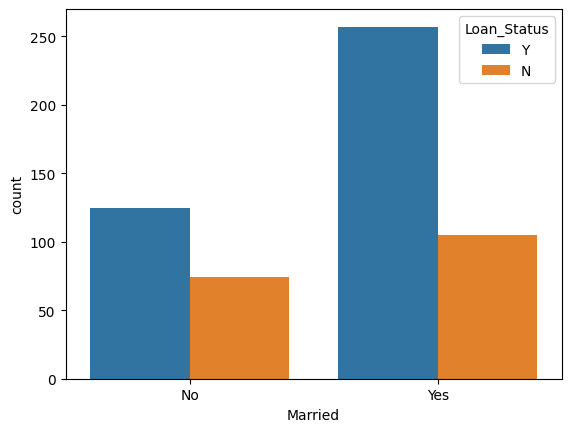

In [43]:
sns.countplot(data=train,x='Married',hue='Loan_Status')

The plot shows that married individuals are more likely to get their loan approved than unmarried individuals.

<Axes: xlabel='Dependents', ylabel='count'>

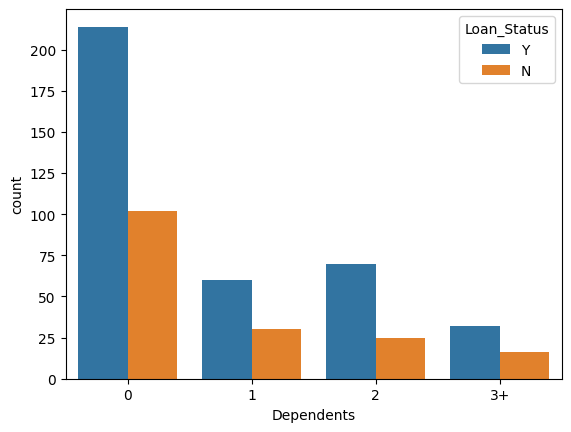

In [44]:
sns.countplot(data=train,x='Dependents',hue='Loan_Status')

The plot shows that individuals with no dependents are more likely to get their loan approved than individuals with one or more dependents.

<Axes: xlabel='Education', ylabel='count'>

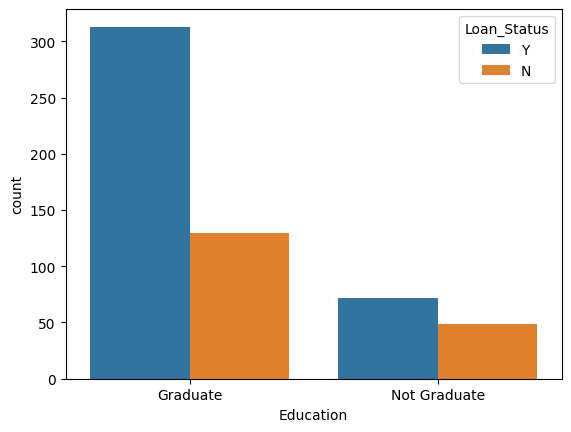

In [45]:
sns.countplot(data=train,x='Education',hue='Loan_Status')

The plot shows graduates are more likely to get their loans approved.

<Axes: xlabel='Self_Employed', ylabel='count'>

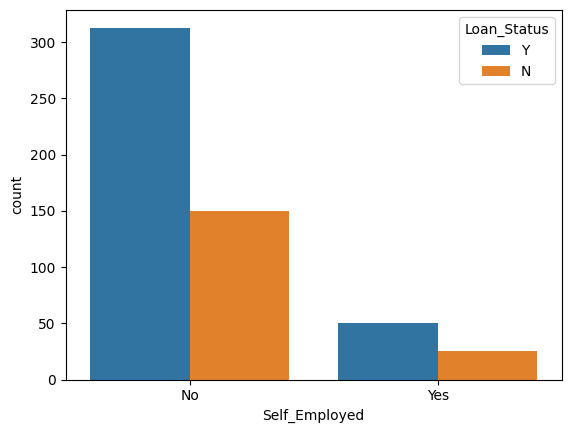

In [46]:
sns.countplot(data=train,x='Self_Employed',hue='Loan_Status')

The plot shows self employed applicants are less likely to get their loans approved.

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

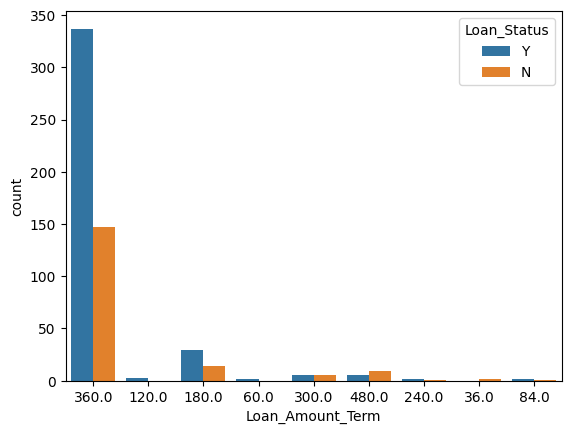

In [47]:
sns.countplot(data=train,x='Loan_Amount_Term',hue='Loan_Status')

The plot shows that individuals with longer loan terms are more likely to get their loan approved than individuals with shorter loan terms. This could be due to the factor that individuals with longer loan terms have higher incomes.

<Axes: xlabel='Property_Area', ylabel='count'>

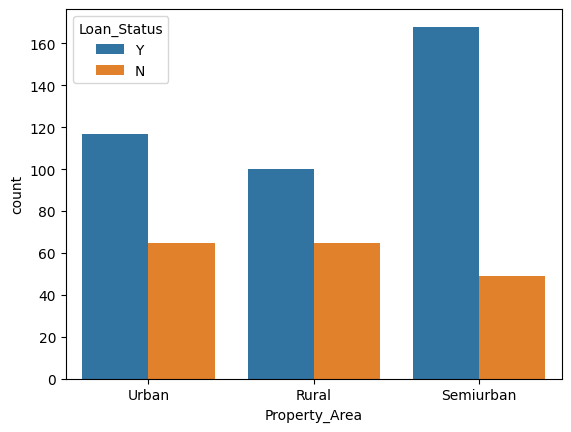

In [48]:
sns.countplot(data=train,x='Property_Area',hue='Loan_Status')

The plot shows that individuals in semi-urban and urban areas are more likely to get their loan approved than individuals in rural areas. This could be due to the fact that,individuals in urban areas might have higher incomes.

From the plots above it can be concluded that the categorical attributes are ordinal in nature.

In [49]:
train['Gender']=train['Gender'].fillna(train['Gender'].mode()[0])
train['Married']=train['Married'].fillna(train['Married'].mode()[0])
train['Dependents']=train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed']=train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])

In [50]:
test['Gender']=test['Gender'].fillna(test['Gender'].mode()[0])
test['Married']=test['Married'].fillna(test['Married'].mode()[0])
test['Dependents']=test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed']=test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])

10. Encoding using LabelEncoder

In [51]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

In [52]:
train['Gender']=le.fit_transform(train['Gender'])
train['Married']=le.fit_transform(train['Married'])
train['Dependents']=le.fit_transform(train['Dependents'])
train['Education']=le.fit_transform(train['Education'])
train['Self_Employed']=le.fit_transform(train['Self_Employed'])
train['Loan_Amount_Term']=le.fit_transform(train['Loan_Amount_Term'])
train['Property_Area']=le.fit_transform(train['Property_Area'])

In [53]:
test['Gender']=le.fit_transform(test['Gender'])
test['Married']=le.fit_transform(test['Married'])
test['Dependents']=le.fit_transform(test['Dependents'])
test['Education']=le.fit_transform(test['Education'])
test['Self_Employed']=le.fit_transform(test['Self_Employed'])
test['Loan_Amount_Term']=le.fit_transform(test['Loan_Amount_Term'])
test['Property_Area']=le.fit_transform(test['Property_Area'])

11. Scaling using MinMaxScaler

In [54]:
from sklearn.preprocessing import MinMaxScaler

min_max=MinMaxScaler()

In [55]:
columns_to_scale=['ApplicantIncome','CoapplicantIncome','LoanAmount']

In [56]:
train[columns_to_scale] = min_max.fit_transform(train[columns_to_scale])
test[columns_to_scale] = min_max.fit_transform(test[columns_to_scale])

In [57]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,0.568748,0.000000,0.463199,5,1.0,2,Y
1,LP001003,1,1,1,0,0,0.442404,0.268089,0.467125,5,1.0,0,N
2,LP001005,1,1,0,0,1,0.284424,0.000000,0.223749,5,1.0,2,Y
3,LP001006,1,1,0,1,0,0.242808,0.419200,0.435721,5,1.0,2,Y
4,LP001008,1,0,0,0,0,0.583818,0.000000,0.518155,5,1.0,2,Y


In [58]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,0.078865,0.000000,0.189815,7,1.0,2
1,LP001022,1,1,1,0,0,0.042411,0.062500,0.226852,7,1.0,2
2,LP001031,1,1,2,0,0,0.068938,0.075000,0.416667,7,1.0,2
4,LP001051,1,0,0,1,0,0.045168,0.000000,0.115741,7,1.0,2
5,LP001054,1,1,0,1,1,0.029850,0.142583,0.287037,7,1.0,2


12. Finding the correlation between the attributes :

<ipython-input-59-c9f098edf4f7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_tr=train.corr()


<Axes: >

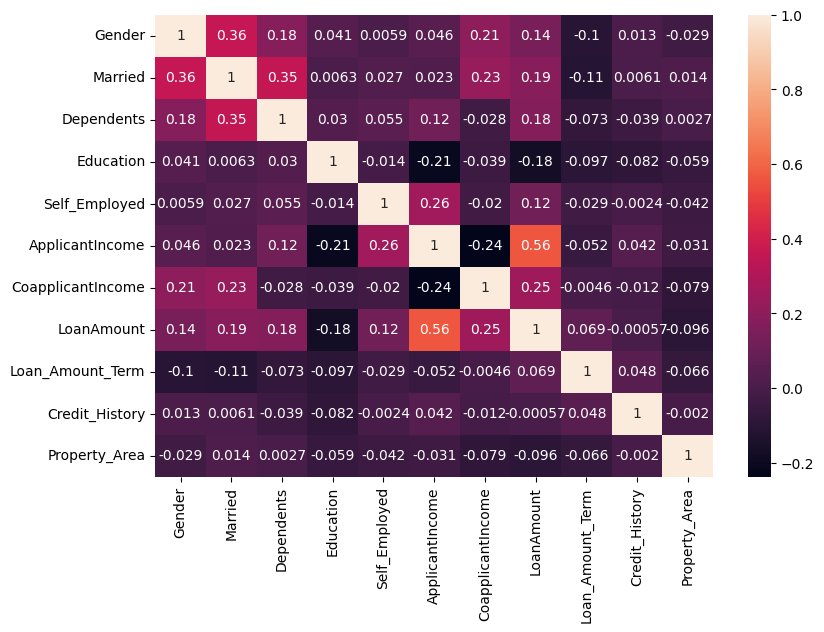

In [59]:
corr_tr=train.corr()
plt.figure(figsize=(9,6))
sns.heatmap(corr_tr,annot=True)

ApplicantIncome and CoapplicantIncome are highly correlated.

LoanAmount and ApplicantIncome are also highly correlated, people with higher incomes are more likely to take out larger loans.

Gender and Loan_Status are not correlated, which means that the gender of the applicant does not have a significant impact on whether or not they are approved for a loan.
